# Iris Flower Classification with Scikit-Learn

![Iris](https://github.com/featurestoreorg/serverless-ml-course/raw/main/src/01-module/assets/iris.png)


In this notebook we will, 

1. Load the Iris Flower dataset into Pandas from a CSV file
2. Split trainind data into train and test sets (one set each for features and labels)
3. Encode the label
4. Train a KNN Model using SkLearn
5. Evaluate model performance on the test set

In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

We are downloading the 'raw' iris data. We explicitly do not want transformed data, reading for training. 

So, let's download the iris dataset, and preview some rows. 

Note, that it is 'tabular data'. There are 5 columns: 4 of them are "features", and the "variety" column is the **target** (what we are trying to predict using the 4 feature values in the target's row).

In [45]:
iris_df = pd.read_csv("https://repo.hops.works/master/hopsworks-tutorials/data/iris.csv")
iris_df.sample(10)

,sepal_length,sepal_width,petal_length,petal_width,variety
144,6.7,3.3,5.7,2.5,Virginica
95,5.7,3.0,4.2,1.2,Versicolor
63,6.1,2.9,4.7,1.4,Versicolor
67,5.8,2.7,4.1,1.0,Versicolor
44,5.1,3.8,1.9,0.4,Setosa
149,5.9,3.0,5.1,1.8,Virginica
23,5.1,3.3,1.7,0.5,Setosa
131,7.9,3.8,6.4,2.0,Virginica
113,5.7,2.5,5.0,2.0,Virginica
42,4.4,3.2,1.3,0.2,Setosa


We can see that our 3 different classes of iris flowers have different *petal_lengths* 
(although there are some overlapping regions between Versicolor and the two other varieties (Setoas, Virginica))

<AxesSubplot:xlabel='variety', ylabel='petal_length'>

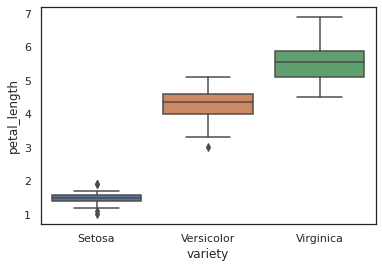

In [46]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='petal_length', data=iris_df)

<AxesSubplot:xlabel='variety', ylabel='sepal_length'>

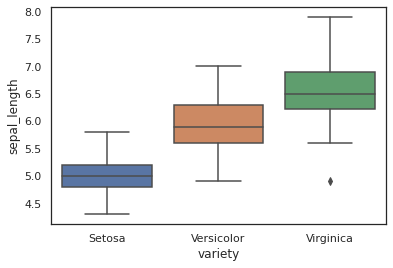

In [47]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='sepal_length', data=iris_df)

<AxesSubplot:xlabel='variety', ylabel='petal_width'>

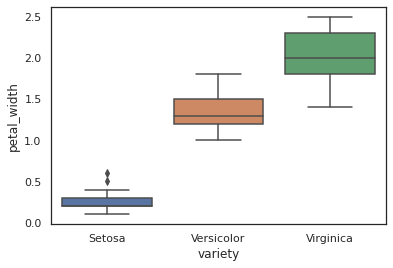

In [48]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='petal_width', data=iris_df)

We need to split our DataFrame into two Dataframes. 

* The **features** DataFrame will contain the inputs for training/inference. 
* The **labels** DataFrame will contain the target we are trying to predict.

Note, that the ordering of the rows is preserved between the features and labels. For example, 'row 40' in the **features** DataFrame contains the correct features for 'row 40' in the **labels** DataFrame. That is, the row index acts like a common "join key" between the two DataFrames.

<AxesSubplot:xlabel='variety', ylabel='sepal_width'>

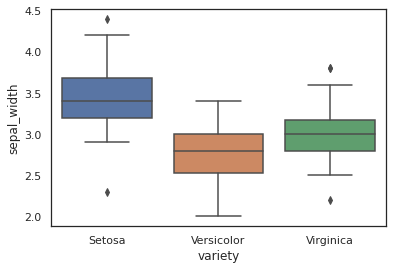

In [49]:
sns.set(style='white', color_codes=True)

sns.boxplot(x='variety', y='sepal_width', data=iris_df)

Split the DataFrame into 2: one DataFrame containing the *features* and one containing the *labels*.

In [50]:
features = iris_df[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
labels = iris_df[["variety"]]
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [51]:
labels

,variety
0,Setosa
1,Setosa
2,Setosa
3,Setosa
4,Setosa
...,...
145,Virginica
146,Virginica
147,Virginica
148,Virginica


We can split our features and labels into a **train_set** and a **test_set**. You split your data into a train_set and a test_set, because you want to train your model on only the train_set, and then evaluate its performance on data that was not seen during training, the test_set. This technique helps evaluate the ability of your model to accurately predict on data it has not seen before.

This looks as follows:

* **X_** is a vector of features, so **X_train** is a vector of features from the **train_set**. 
* **y_** is a scale of labels, so **y_train** is a scalar of labels from the **train_set**. 

Note: a vector is an array of values and a scalar is a single value.

Note: that mathematical convention is that a vector is denoted by an uppercase letter (hence "X") and a scalar is denoted by a lowercase letter (hence "y").

**X_test** is the features and **y_test** is the labels from our holdout **test_set**. The **test_set** is used to evaluate model performance after the model has been trained.


In [52]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(features, labels, test_size=0.2)

Now we will do some **Feature Engineering**. 

We will transform the label from a categorical variable (a string) into a numerical variable (an int). Many machine learning training algorithms only take numerical values as inputs for training (and inference).

We can see that our original lables (**y_train** and **y_test**) are categorical variables. We will use Scikit-Learn's **LabelEncoder** to transform the strings into numbers.

In [53]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
y_train_encoded=le.fit_transform(y_train['variety'])
y_test_encoded = le.transform(y_test['variety'])
y_test.head(8)

,variety
107,Virginica
35,Setosa
27,Setosa
79,Versicolor
70,Versicolor
84,Versicolor
112,Virginica
136,Virginica


We can see that **y_test_encoded** has been transformed into a numerical variable (an int). **y_train_encoded** has been similarly transformed.

In [54]:
y_test_encoded[0:8]

array([2, 0, 0, 1, 1, 1, 2, 2])

Now, we can fit a model to our features and labels from our training set (**X_train** and **y_train_encoded**). Fitting a model to a dataset is more commonly called "training a model".

In [55]:
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train_encoded) 

KNeighborsClassifier(n_neighbors=4)

Now, we have trained our model. We can evaluate our model on the **test_set** to estimate its performance.
Notice that the model was trained to output the encoded labels (numbers).

In [56]:
y_pred_encoded = model.predict(X_test)
y_pred_encoded

array([2, 0, 0, 1, 2, 1, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 1, 2, 0, 1, 2, 1,
       0, 0, 0, 0, 2, 0, 1, 1])

We can look at the predicted flower names by inverse transforming our numerical predictions back into their original string form. To perform the inverse transform, we need the **le** (LabelEncoder) object used to perform the orginal categorical to numerical mapping.

In [57]:
le.inverse_transform(y_pred_encoded)

array(['Virginica', 'Setosa', 'Setosa', 'Versicolor', 'Virginica',
       'Versicolor', 'Virginica', 'Virginica', 'Versicolor', 'Virginica',
       'Versicolor', 'Setosa', 'Versicolor', 'Virginica', 'Setosa',
       'Versicolor', 'Versicolor', 'Virginica', 'Setosa', 'Versicolor',
       'Virginica', 'Versicolor', 'Setosa', 'Setosa', 'Setosa', 'Setosa',
       'Virginica', 'Setosa', 'Versicolor', 'Versicolor'], dtype=object)

We can report on how accurate these predictions (**y_pred_encoded**) are compared to the labels (the actual results - **y_test_encoded**). 

In [58]:
from sklearn.metrics import classification_report

metrics = classification_report(y_test_encoded, y_pred_encoded)
print(metrics)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [59]:
from sklearn.metrics import confusion_matrix

results = confusion_matrix(y_test_encoded, y_pred_encoded)
print(results)

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


<AxesSubplot:>

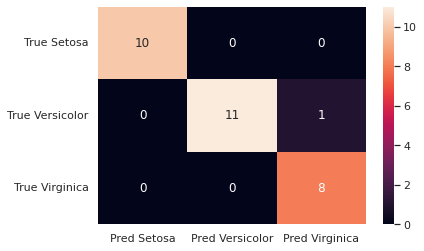

In [60]:
from matplotlib import pyplot

# Setosa = 0, Versicolor = 1, Virginica = 2

df_cm = pd.DataFrame(results, ['True Setosa', 'True Versicolor', 'True Virginica'],
                     ['Pred Setosa', 'Pred Versicolor', 'Pred Virginica'])

sns.heatmap(df_cm, annot=True)

Homework task

Rewrite the last two cells, but instead of computing the *classification_report* and the *confusion_matrix* with the encoded labels, use the unencoded labels. 

Are the results the same? Why?

In [61]:
from sklearn.metrics import confusion_matrix

predictions_untransformed = le.inverse_transform(y_pred_encoded)
results = confusion_matrix(y_test, predictions_untransformed)
print(results)

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


In [62]:
!pip install gradio --quiet
!pip install typing-extensions==4.3.0

In [63]:
import gradio as gr
import numpy as np


def iris(sl, sw, pl, pw):
    input_list = []
    input_list.append(sl)
    input_list.append(sw)
    input_list.append(pl)
    input_list.append(pw)
    res = model.predict(np.asarray(input_list).reshape(1, -1)) 
    # Convert the numerical representation of the label back to it's original iris flower name.
    # le.inverse_transform returns a list of flower names with only 1 entry, so we add '[0]' to 
    # the list returned by le.inverse_transform(..) to return only the iris flower name (not the list)
    return le.inverse_transform(res)[0]

demo = gr.Interface(
    fn=iris,
    title="Iris Flower Predictive Analytics",
    description="Experiment with sepal/petal lengths/widths to predict which flower it is.",
    allow_flagging="never",
    inputs=[
        gr.inputs.Number(default=1.0, label="sepal length (cm)"),
        gr.inputs.Number(default=1.0, label="sepal width (cm)"),
        gr.inputs.Number(default=1.0, label="petal length (cm)"),
        gr.inputs.Number(default=1.0, label="petal width (cm)"),
        ],
    outputs="text")

demo.launch(share=True)

/home/jdowling/anaconda3/lib/python3.9/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)


Running on local URL:  http://127.0.0.1:7869/
Running on public URL: https://14120.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7faa1878b700>,
 'http://127.0.0.1:7869/',
 'https://14120.gradio.app')